# LOGISTIC REGRESSION

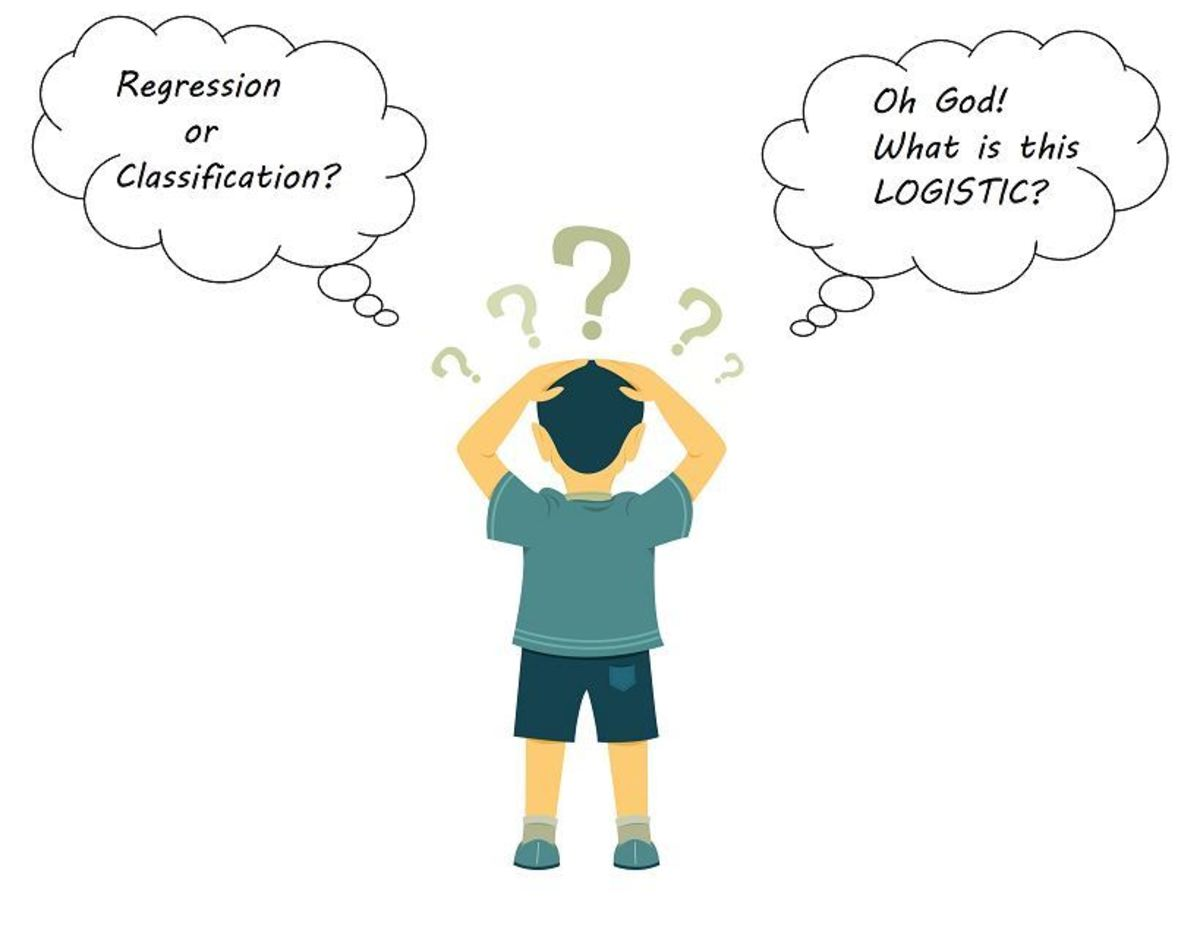

### Introduction: 
Logistic regression is a regression analysis that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category. For this particular notebook we will try to predict whether a customer will churn using a Logistic Regression.

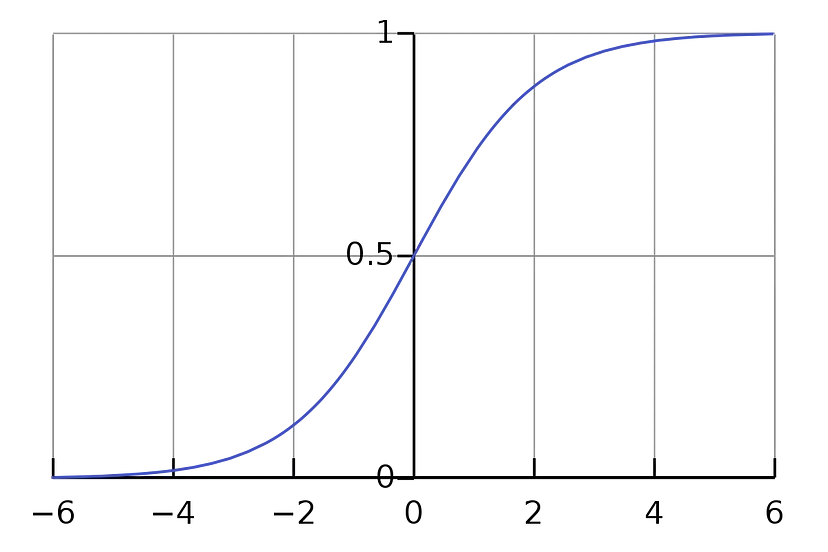

### Sigmoid function

Sigmoid function produces an S-shaped curve. It always returns a probability value between 0 and 1. The Sigmoid function is used to convert expected values to probabilities. The function converts any real number into a number between 0 and 1. We utilize sigmoid to translate predictions to probabilities in machine learning.

Mathematically sigmoid function can be,

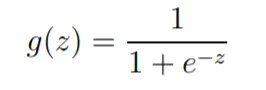

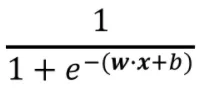

where z = w.X + b

### Loss/Cost function

The following is the Binary Coss-Entropy Loss or the Log Loss function 

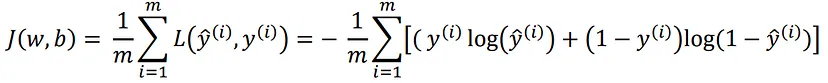

### Gradient Descent

Now that we know our hypothesis function and the loss function, all we need to do is use the Gradient Descent Algorithm to find the optimal values of our parameters like this(lr →learning rate)

**w := w-lr*dw**

**b := b-lr*db**

where, dw is the partial derivative of the Loss function with respect to w and db is the partial derivative of the Loss function with respect to b .

**dw = (1/m)*(y_hat — y).X**

**db = (1/m)*(y_hat — y)**


# Importing th libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Implementing Logistic Regression from Scratch

In [93]:
class logistic_regression():
    
    def __init__ (self , learning_rate, no_of_iterations):
        
        self.l_rate = learning_rate
        self.n_iteration = no_of_iterations
        self_weights,self.bias=None,None
        
        
    def fit (self,x,y):
        
        
        self.m , self.n = x.shape
       
    
        # 1. Initialize weights and bias to zeros
    
    
        self.weights=np.zeros(self.n)
        self.bias=0
        
        
         # 2. Perform gradient descent
        
        for i in range(self.n_iteration):
            
             # Sigmoid equation
                
                
            z=np.dot(x, self.weights)+self.bias
            y_pred = sigmoid(z)
            
            
            # Calculate derivatives
            
            dw = (1/self.m)*np.dot(x.T,(y_pred - y))
            db = (1/self.m)*np.sum(y_pred - y)
            
            
            # Update the coefficients
            
            self.weights= self.weights-self.l_rate*dw
            self.bias = self.bias- self.l_rate*db
            
            
    def predict (self, x):
        
        z=np.dot(x, self.weights)+self.bias
        y_pred = sigmoid(z)
        
        class_label=[1 if y >0.5 else 0 for y in y_pred]
        return class_label

# Sigmoid function

In [92]:
def sigmoid(z):
    
    return 1/(1+np.log(-z))

# Loading the data

In [66]:
data = pd.read_csv("C:/Users/gokul/OneDrive/Desktop/machine_learning/projects/diabetes.csv")

In [67]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
data.shape

(768, 9)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Cleaning

In [70]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
data.duplicated().sum()

0

In [72]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [73]:
q1=data['Insulin'].quantile(0.25)
q2=data['Insulin'].quantile(0.75)
data['Insulin']=np.where(data['Insulin']<q1,q1,data['Insulin'])
data['Insulin']=np.where(data['Insulin']>q2,q2,data['Insulin'])

In [74]:
q1=data['DiabetesPedigreeFunction'].quantile(0.25)
q2=data['DiabetesPedigreeFunction'].quantile(0.75)
data['DiabetesPedigreeFunction']=np.where(data['DiabetesPedigreeFunction']<q1,q1,data['DiabetesPedigreeFunction'])
data['DiabetesPedigreeFunction']=np.where(data['DiabetesPedigreeFunction']>q2,q2,data['DiabetesPedigreeFunction'])

In [75]:
q1=data['Age'].quantile(0.25)
q2=data['Age'].quantile(0.75)
data['Age']=np.where(data['Age']<q1,q1,data['Age'])
data['Age']=np.where(data['Age']>q2,q2,data['Age'])

In [76]:
q1=data['BloodPressure'].quantile(0.25)
q2=data['BloodPressure'].quantile(0.75)
data['BloodPressure']=np.where(data['BloodPressure']<q1,q1,data['BloodPressure'])
data['BloodPressure']=np.where(data['BloodPressure']>q2,q2,data['BloodPressure'])

In [77]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -0.055658
SkinThickness               0.109372
Insulin                     0.315191
BMI                        -0.428982
DiabetesPedigreeFunction    0.268987
Age                         0.329324
Outcome                     0.635017
dtype: float64

In [78]:
x=data.drop('Outcome',axis=1)
y=data.Outcome

<AxesSubplot:ylabel='Outcome'>

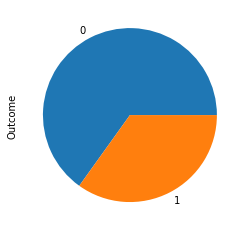

In [109]:
y.value_counts().plot(kind='pie')

# Balancing the data

In [16]:
from imblearn.under_sampling import NearMiss

In [17]:
usample= NearMiss(version=2,n_neighbors=3)

In [18]:
x,y=usample.fit_resample(x,y)

<AxesSubplot:ylabel='Outcome'>

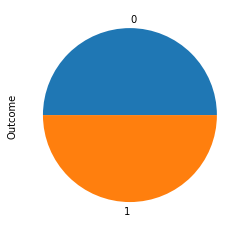

In [19]:
y.value_counts().plot(kind='pie')

# Spliting the data into train and test

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Feature Scaling 

In [91]:
from sklearn.preprocessing import StandardScaler
ssc= StandardScaler()
X_train=ssc.fit_transform(X_train)
X_test=ssc.transform(X_test)

# Training our model

In [94]:
lr=logistic_regression( 0.001,10000)

In [95]:
lr.fit(X_train,y_train)

C:\Users\gokul\AppData\Local\Temp\ipykernel_24408\817348616.py:3: RuntimeWarning: divide by zero encountered in log
  return 1/(1+np.log(-z))
C:\Users\gokul\AppData\Local\Temp\ipykernel_24408\817348616.py:3: RuntimeWarning: invalid value encountered in log
  return 1/(1+np.log(-z))


In [96]:
y_hat=lr.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score 

In [99]:
accuracy_score(y_hat,y_test)

0.7012987012987013

# Implementing Logistic Regression from Scikit learn

In [100]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [101]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [102]:
y_pred1=lreg.predict(X_test)

In [103]:
y_pred1

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [104]:
accuracy_score(y_test,y_pred1)

0.7597402597402597